# CPSC 302: Assignment 8
## Nicholas Hu

### Exercise 1

In [1]:
#=
CPSC 302 Assignment 8
Nicholas Hu
=#

using Plots
pyplot()
using LaTeXStrings
using LightGraphs, GraphLayout

In [2]:
u = 1:32
v = [1:30; 30; 32]
M = randn(32, 32)
Q, R = qr(M)
A = Q * diagm(u) * Q'
B = Q * diagm(v) * Q'

rayleigh = (A, v) -> (v' * A * v)[1]

eA, eB = maximum(eigvals(A)), maximum(eigvals(B))
v0 = randn(size(A, 1))
tol = 1e-10
err_A, err_B = [Inf], [Inf]

v = v0
while err_A[end] >= tol
    v = A*v
    v /= norm(v)
    push!(err_A, abs(rayleigh(A, v) - eA))
end

v = v0
while err_B[end] >= tol
    v = B*v
    v /= norm(v)
    push!(err_B, abs(rayleigh(B, v) - eB))
end


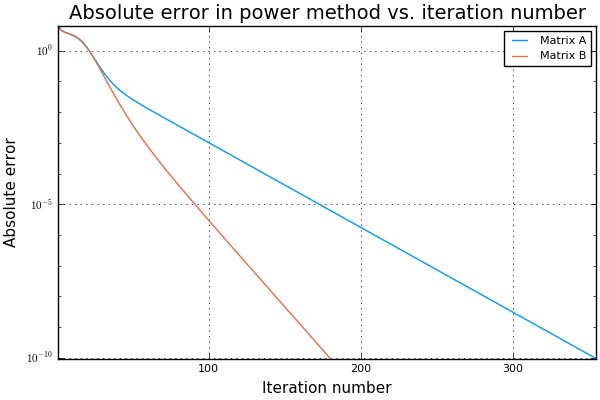

Ratio of iterations taken: 1.977778


In [3]:
p = plot(err_A[2:end], yscale=:log10, label="Matrix A",
         title="Absolute error in power method vs. iteration number",
         xlabel="Iteration number",
         ylabel="Absolute error")
plot!(err_B[2:end], label="Matrix B")
display(p)
@printf("Ratio of iterations taken: %f\n", (length(err_A - 1)) / (length(err_B) - 1))

The symmetric matrices $A$ and $B$ are constructed from orthogonal diagonalizations $Q \Lambda Q^\top$ (using an orthogonal matrix $Q$ from the QR decomposition of a random matrix $M$). Hence the eigenvalues of $A$ and $B$ are the (diagonal) elements of the $\Lambda$'s: namely, $1, 2, \dots, 32$ and $1, 2, \dots, 30, 30, 32$, respectively.

From the derivation of the power method (and following example 8.2), the ratio of the *rates* of convergence of $A$ and $B$ is $\log (\lambda_{A, 2} / \lambda_{A, 1}) \ /\ \log(\lambda_{B, 2} / \lambda_{B, 1}) = \log (31 / 32) \ /\ \log(30 / 32) \approx 0.49$, where $\lambda_{M, i}$ denotes the $i$-th largest eigenvalue of $M$. Hence the method converges $0.49$ times as quickly for $A$ than it does for $B$, i.e., the method takes $1 \ /\ 0.49 \approx 2.03$ times as many *iterations* for $A$ than it does for $B$. This is indeed close to what we observe empirically (see output above, below plot).

### Exercise 2

#### (a)

Using the compact SVD, we have $A = U_r \Sigma_r V_r^\top$ with $U_r, V_r$ having orthonormal columns and $\Sigma_r$ diagonal. Then 

\begin{align}
A^\top A &= (U_r \Sigma_r V_r^\top)^\top U_r \Sigma_r V_r^\top \\
&= V_r \Sigma_r^\top U_r^\top U_r \Sigma_r V_r^\top \\
&= V_r \Sigma_r^2 V_r^\top.
\end{align}

But if $\mathrm{rank}(A) = r = n$ (i.e., $A$ has full column rank), $V_r$ is in fact $n \times n$ *orthogonal*, so we can write $(A^\top A)^{-1} = V_r^{-\top} \Sigma_r^{-2} V_r^{-1} = V_r \Sigma_r^{-2} V_r^\top$, showing that $A^\top A$ is nonsingular. (Clearly, $\Sigma_r^2$ is invertible as it is a diagonal matrix with no zero entries on its diagonal.)

#### (b)

It suffices to show that $P = A (A^\top A)^{-1} A^\top$ satisfies $P^2 = P$ and $P^\top = P$. First,

$$
P^2 = A (A^\top A)^{-1} (A^\top A) (A^\top A)^{-1} A^\top = A (A^\top A)^{-1} A^\top = P
$$

as desired. Second,

$$
P^\top = A (A^\top A)^{-\top} A^\top = A (A^\top A)^{-1} A^\top = P
$$

since $A^\top A$ is itself symmetric.

#### (c)

We know (from the normal equations) that the least squares solution to $A \vec{x} = \vec{b}$ is $\vec{x} = (A^\top A)^{-1} A^\top \vec{b}$. Thus the residual $\vec{r} = \vec{b} - A \vec{x}$ is $\vec{b} - A (A^\top A)^{-1} A^\top \vec{b}$. Hence $P = I - A (A^\top A)^{-1} A^\top$, which is the complementary projector to the one in (b) (and is therefore itself a projector).

#### (d)

Using the thin QR factorization $A = QR$ with $Q$ having orthonormal columns and $R$ square upper-triangular,

\begin{align}
P &= I - A (A^\top A)^{-1} A^\top \\
&= I - (QR) ((QR)^\top (QR))^{-1} (QR)^\top \\
&= I - (QR) (R^\top R)^{-1} (QR)^\top && \text{since $Q^\top Q = I_n$} \\
&= I - QR R^{-1} R^{-\top} R^\top Q^\top && \text{since $A$ has full column rank} \\
&= I - QQ^\top.
\end{align}

#### (e)

We observe that the equation in (c) implies that the ordinary least squares solution satisfies $A \vec{x} = \vec{b} - P \vec{b} = (I - P) \vec{b}$. Hence the solution $\vec{y}$ to the modified problem satisfies $A \vec{y} = (I - P)(\vec{b} + \alpha \vec{r}) = (I - P) \vec{b} + \alpha \vec{r} - \alpha P \vec{r}$. 

But $QQ^\top$ is the orthogonal projector onto $\mathrm{im}(A)$, so $P = I - QQ^\top$ is the orthogonal projector onto $\mathrm{im}(A)^\perp = \mathrm{ker}(A^\top)$. Since $\vec{r} \in \mathrm{ker}(A^\top)$, it follows that $P \vec{r} = \vec{r}$, so $A \vec{y} = (I - P) \vec{b}$. Hence $A (\vec{x} - \vec{y}) = \vec{0}$, and since $A$ has full column rank, this implies that $\vec{x} = \vec{y}$ as claimed.

### Exercise 3

(See MATLAB code and plots.)

### Exercise 4

#### (a)

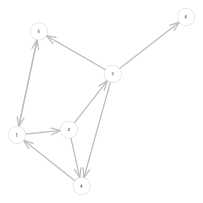

In [4]:
s = [1, 1, 2, 2, 3, 3, 3, 4, 5]
d = [2, 5, 3, 4, 4, 5, 6, 1, 1]
n = 6

G = DiGraph(n)
for e = 1:length(s)
    add_edge!(G, s[e], d[e])
end

A = full(adjacency_matrix(G))
loc_x, loc_y = layout_spring_adj(A)
draw_layout_adj(A, loc_x, loc_y, labels=collect(1:6), nodefillc="#FFFFFF")

#### (b)


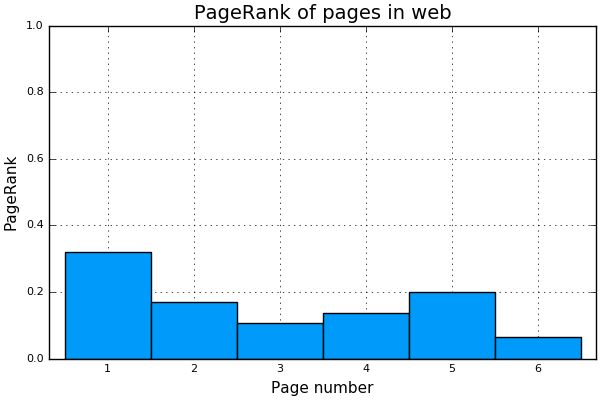

In [5]:
H = Matrix{Float64}(n, n)

for i = 1:n
    d = outdegree(G, i)
    if d == 0
        H[i, :] = ones(n) / n
    else
        H[i, out_neighbors(G, i)] = 1 / d
    end
end

a = 0.85  # Damping factor
H2 = a * H + (1-a) * ones(n, n) / n
v = abs(real(eigvecs(H2')[:, 1]))  # Dominant eigenvector
v /= norm(v, 1)

bar(v, label="", xticks=1:n, ylims=[0, 1], title="PageRank of pages in web", 
    xlabel="Page number", ylabel="PageRank")